Assignment-01
S M Abu HUryra
20-42480-1

In [1]:
import os
import random
import cv2 as cv
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!git clone https://github.com/YoongiKim/CIFAR-10-images

fatal: destination path 'CIFAR-10-images' already exists and is not an empty directory.


In [3]:
TRAIN_DIR='/content/CIFAR-10-images/test'

CATEGORIES=os.listdir(TRAIN_DIR)
TRAIN_DATA=[]

In [4]:
for c in CATEGORIES:
  path=os.path.join(TRAIN_DIR,c)
  class_num = CATEGORIES.index(c)
  image_files = os.listdir(path)

  for img in tqdm (image_files):
    img_path = os.path.join(path,img)
    img_arr = cv.imread(img_path)
    image_gray = cv.cvtColor(img_arr,cv.COLOR_BGR2GRAY)
    TRAIN_DATA.append([image_gray,class_num])

100%|██████████| 1000/1000 [00:00<00:00, 18531.48it/s]


In [5]:
random.shuffle(TRAIN_DATA)

In [6]:
f0=TRAIN_DATA[0:2000]
f1=TRAIN_DATA[0:2000]
f2=TRAIN_DATA[0:2000]
f3=TRAIN_DATA[0:2000]
f4=TRAIN_DATA[0:2000]

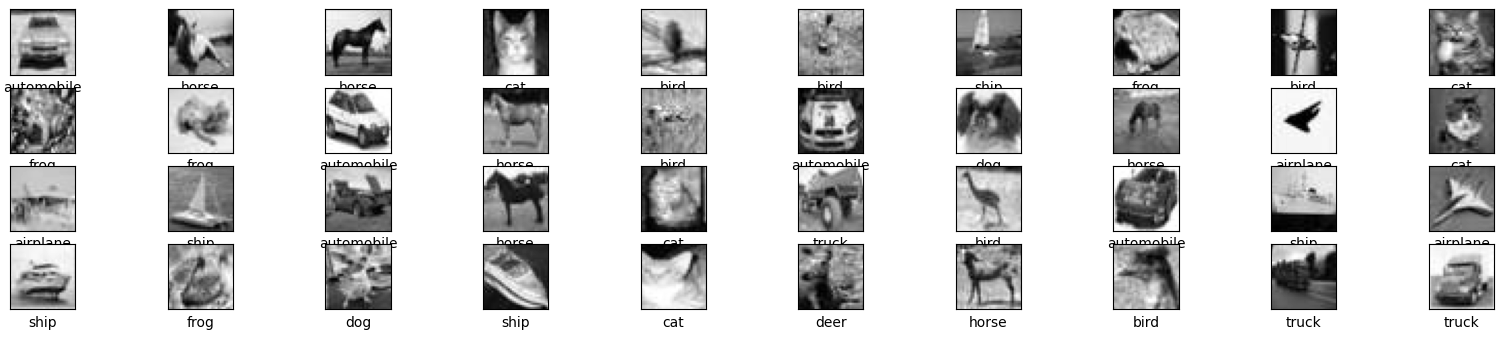

In [7]:
plt.figure(figsize=(20,10))
for i in range(40):
  plt.subplot(10,10,i+1)
  image = TRAIN_DATA[i][0]
  plt.imshow(image,cmap='gray')
  plt.xlabel(CATEGORIES[TRAIN_DATA[i][1]])
  plt.xticks([])
  plt.yticks([])
plt.show()

In [8]:
def l1_dist(x,y):
  return np.sum(np.abs(x-y))
def l2_dist(x,y):
  return np.sqrt(np.sum((x-y)**2))
def knn_classify(train_data, new_image, k, distance_func):
  distances=[]

  for item in train_data:
    train_image=item[0]
    label=item[1]
    distance=distance_func(new_image,train_image)
    distances.append((distance,label))

  distances.sort(key=lambda x:x[0])
  k_nearest =distances[:k]

  class_votes =[0]*len(CATEGORIES)
  for _, label in k_nearest:
    class_votes[label] +=  1

  predicted_class = np.argmax(class_votes)
  return predicted_class


In [9]:
k_values=[2,4,6,8,10]

def cross_validation_k_values(data,k_values,distance_func):
  num_folds =5
  fold_size =len(data)//num_folds
  accuracies=[]
  for k in k_values:
    k_accuracies=[]

    for fold in range (num_folds):
      test_data = data[fold*fold_size :(fold+1)*fold_size]
      train_data = data[:fold*fold_size]+data[(fold+1)*fold_size:]

      correct_predictions=0

      for test_item in test_data:
        test_image = test_item[0]
        test_label = test_item[1]

        predicted_class = knn_classify(train_data, test_image, k, distance_func)
        if predicted_class == test_label:
           correct_predictions += 1

      accuracy = correct_predictions/len(test_data)
      k_accuracies.append(accuracy)

    k_mean_accuracy = np.mean(k_accuracies)
    accuracies.append((k, k_mean_accuracy))

  return accuracies

manhattan_accuracies = cross_validation_k_values(f0,k_values,l1_dist)
euclidean_accuracies = cross_validation_k_values(f0,k_values,l2_dist)

manhattan_accuracies = [accuracy for k , accuracy in manhattan_accuracies ]
euclidean_accuracies = [accuracy for k , accuracy in euclidean_accuracies ]


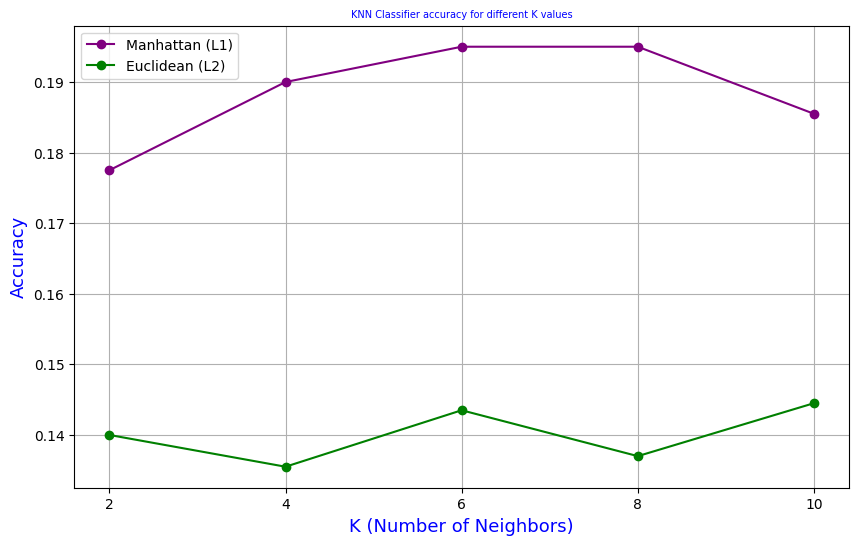

In [10]:
plt.figure(figsize=(10,6))
plt.plot(k_values,manhattan_accuracies , marker ='o', color='purple',label='Manhattan (L1)')
plt.plot(k_values,euclidean_accuracies , marker ='o', color='green',label='Euclidean (L2)')
plt.xlabel('K (Number of Neighbors)', color='blue',size='13')
plt.ylabel('Accuracy', color='blue',size='13')
plt.title('KNN Classifier accuracy for different K values' , color= 'blue', size='07')
plt.xticks(k_values)
plt.legend()
plt.grid()
plt.show()

In [11]:
import random
def display_top_predictions(test_image, k_values,distance_func):
  predicted_classes =[]

  for k in k_values:
    predicted_class = knn_classify(f0, test_image, k, distance_func)
    predicted_classes.append((k,predicted_class))
  predicted_classes.sort(key=lambda x:x[0])

  print("Top 5 predictions:")
  for k , predicted_class in predicted_classes[:5]:
    print(f"K={k}, Predicted class:{CATEGORIES[predicted_class]}")
test_image =random.choice(f0)[0]
display_top_predictions(test_image, k_values,l1_dist)


Top 5 predictions:
K=2, Predicted class:deer
K=4, Predicted class:ship
K=6, Predicted class:deer
K=8, Predicted class:dog
K=10, Predicted class:airplane


True Label: horse
True Label: frog
True Label: airplane
True Label: cat
True Label: airplane
Best Manhattan Prediction K=2, Predicted Class=horse, Accuracy=0.00%
Best Euclidean Prediction K=2, Predicted Class=horse, Accuracy=0.00%



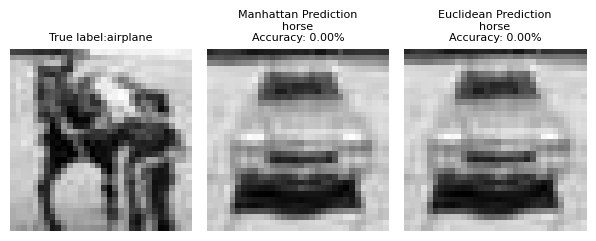

In [12]:
num_test_images = 5
test_images = [(random.choice(f0)[0], random.choice(f0)[1]) for _ in range(num_test_images)]

best_manhattan_accuracy=0
best_euclidean_accuracy=0

for test_image, true_label in test_images:
  print(f"True Label: {CATEGORIES[true_label]}")
  best_manhattan_k=0
  best_manhattan_pred=-1
  best_manhattan_accuracy=-1
  best_euclidean_k=0
  best_euclidean_pred=-1
  best_euclidean_accuracy=-1

  for k in k_values:
    predicted_manhattan_class=knn_classify(f0, test_image, k,l1_dist)
    manhattan_accuracy = (predicted_manhattan_class==true_label).mean()*100
    predicted_euclidean_class=knn_classify(f0, test_image, k,l2_dist)
    euclidean_accuracy = (predicted_euclidean_class==true_label).mean()*100

    if manhattan_accuracy>best_manhattan_accuracy:
      best_manhattan_k=k
      best_manhattan_pred=predicted_manhattan_class
      best_manhattan_accuracy=manhattan_accuracy
    if euclidean_accuracy>best_euclidean_accuracy:
      best_euclidean_k=k
      best_euclidean_pred=predicted_euclidean_class
      best_euclidean_accuracy=euclidean_accuracy
print(f"Best Manhattan Prediction K={best_manhattan_k}, Predicted Class={CATEGORIES[best_manhattan_pred]}, Accuracy={best_manhattan_accuracy:.2f}%")
print(f"Best Euclidean Prediction K={best_euclidean_k}, Predicted Class={CATEGORIES[best_euclidean_pred]}, Accuracy={best_euclidean_accuracy:.2f}%")

print()

plt.figure(figsize=(10,6))
plt.subplot(1,5,1)
plt.imshow(test_image,cmap="gray")
plt.title(f"True label:{CATEGORIES[true_label]}",fontsize=8)
plt.axis("off")

plt.subplot(1,5,2)
plt.imshow(f0[best_manhattan_pred][0],cmap="gray")
plt.title(f"Manhattan Prediction\n{CATEGORIES[best_manhattan_pred]}\nAccuracy: {best_manhattan_accuracy:.2f}%", fontsize=8)
plt.axis("off")

plt.subplot(1,5,3)
plt.imshow(f0[best_euclidean_pred][0],cmap="gray")
plt.title(f"Euclidean Prediction\n{CATEGORIES[best_euclidean_pred]}\nAccuracy: {best_euclidean_accuracy:.2f}%", fontsize=8)
plt.axis("off")

plt.tight_layout()
plt.show()
